In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

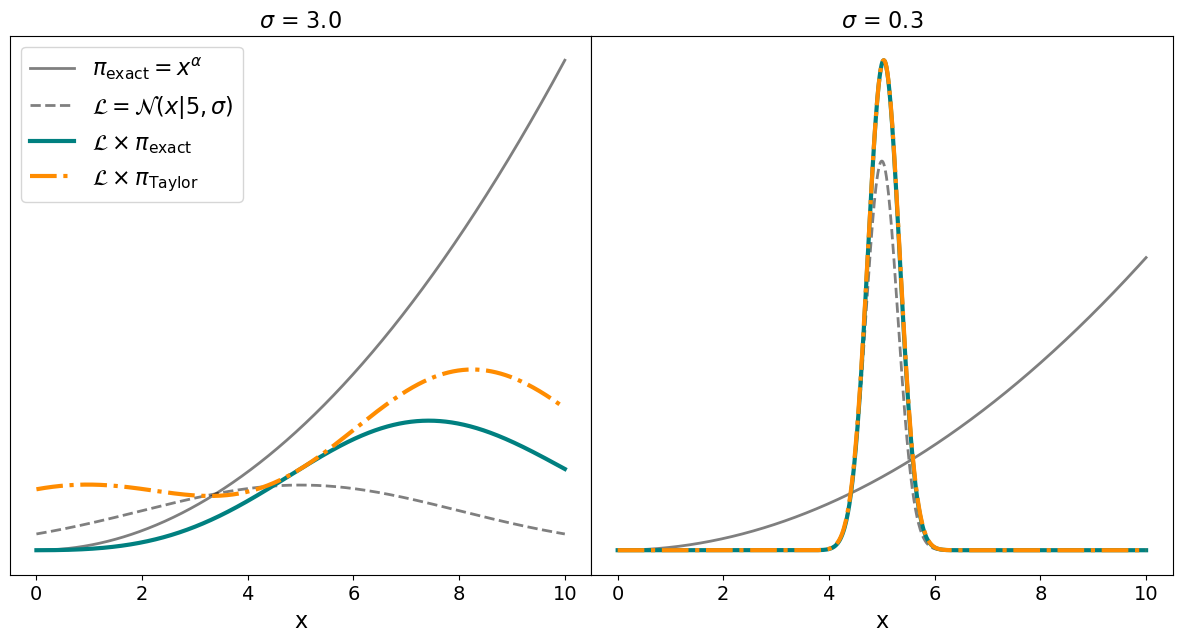

In [8]:
def prior(x, alpha):
    return x ** alpha

def prior_taylor(x, x_hat, alpha):
    return (x_hat ** alpha) + ((x - x_hat) * alpha * x_hat ** (alpha - 1)) + ((x - x_hat) ** 2 * alpha ** 2 * x_hat ** (alpha - 2))

def likelihood(x, x_hat, sigma):
    return norm.pdf(x, loc=x_hat, scale=sigma)

alpha = 2.0
x_hat = 5.0
sigma = [3e0, 3e-1]
x = np.linspace(0.001,10,1000)

fig, axs = plt.subplots(1,2,figsize=(15,7))

prior_x = prior(x,alpha) * (x[-1] - x[0])/len(x)#/np.sum(prior(x,alpha))
prior_taylor_x = prior_taylor(x, x_hat, alpha)* (x[-1] - x[0])/len(x) #/np.sum(prior_taylor(x, x_hat, alpha))

for i in range(len(sigma)):
    likelihood_x = likelihood(x,x_hat,sigma[i])#/np.sum(likelihood(x,x_hat,sigma[i]))

    axs[i].plot(x, prior_x, color='black', linewidth=2,alpha=0.5, label=r'$\pi_{\rm exact} = x^\alpha$')
    axs[i].plot(x, likelihood_x, color='black', linewidth=2,linestyle='--', alpha=0.5, label = r'$\mathcal{L} = \mathcal{N}(x|5, \sigma)$')
    axs[i].plot(x, 5 * prior_x * likelihood_x, color='teal', linewidth=3, label=r'$\mathcal{L}\times \pi_{\rm exact}$')
    axs[i].plot(x, 5 * prior_taylor_x * likelihood_x, color='darkorange',linewidth=3, linestyle='-.', label=r'$\mathcal{L}\times \pi_{\rm Taylor}$')
    axs[i].set_title(r"$\sigma$"+f" = {sigma[i]}", fontsize = 16)
    
    axs[i].set_xlabel('x', fontsize=16)
    axs[i].set_yticks([])
    #axs[i].set_xlim([4,6])
    axs[i].tick_params(axis='x', labelsize=14)
    
axs[0].legend(fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('visual_taylorprior.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()